## [範例 : 計程車費率預測](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction)

https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

## [教學目標]

使用程車費率預測競賽練習時間欄位處理

## [範例重點]

觀察時間特徵分解, 在線性迴歸分數 / 梯度提升樹分數上, 分別有什麼影響 (In[2], Out[2], In[3], Out[3])

觀察加入週期循環特徵, 在線性迴歸分數 / 梯度提升樹分數上, 分別有什麼影響 (In[4], Out[4], In[5], Out[5])

In [1]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

data_path = '/Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/data/Part02/'
df = pd.read_csv(data_path + 'taxi_data1.csv')

train_Y = df['fare_amount']
df = df.drop(['fare_amount'] , axis=1)
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-10-21 23:54:10 UTC,-73.990580,40.761071,-73.981128,40.758634,2
1,2015-02-03 10:42:03 UTC,-73.988403,40.723431,-73.989647,40.741695,1
2,2014-03-16 18:58:58 UTC,-74.015785,40.715110,-74.012029,40.707888,2
3,2009-06-13 16:10:54 UTC,-73.977322,40.787275,-73.958030,40.778838,3
4,2014-06-12 03:25:56 UTC,-73.989683,40.729717,-73.982490,40.761887,3


In [2]:
# 時間轉換方式 : 使用 datetime.strptime 解析(parse)時間字串 / 使用 datetime.strftime 匯出時間格式(format)
# 參考官網 https://docs.python.org/3/library/datetime.html
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S UTC'))
df['pickup_year'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%Y')).astype('int64')
df['pickup_month'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%m')).astype('int64')
df['pickup_day'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%d')).astype('int64')
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%H')).astype('int64')
df['pickup_minute'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%M')).astype('int64')
df['pickup_second'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%S')).astype('int64')
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56


In [3]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
display(df_temp.head())
scaler = MinMaxScaler()
train_X = scaler.fit_transform(df_temp)

# 線性迴歸
Linear = LinearRegression()
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
# 梯度提升樹
GDBT = GradientBoostingRegressor()
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10
1,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3
2,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58
3,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54
4,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56


Linear Reg Score : 0.026876871475633158
Gradient Boosting Reg Score : 0.7112693962011718


In [4]:
# 加上"日週期"特徵 (參考講義"週期循環特徵")
import math
df['day_cycle'] = df['pickup_hour']/12 + df['pickup_minute']/720 + df['pickup_second']/43200
df['day_cycle'] = df['day_cycle'].map(lambda x : math.sin(x * math.pi))
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,day_cycle
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10,-0.025450
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3,0.333601
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58,-0.967083
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54,-0.888817
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56,0.782427


## 講義支援

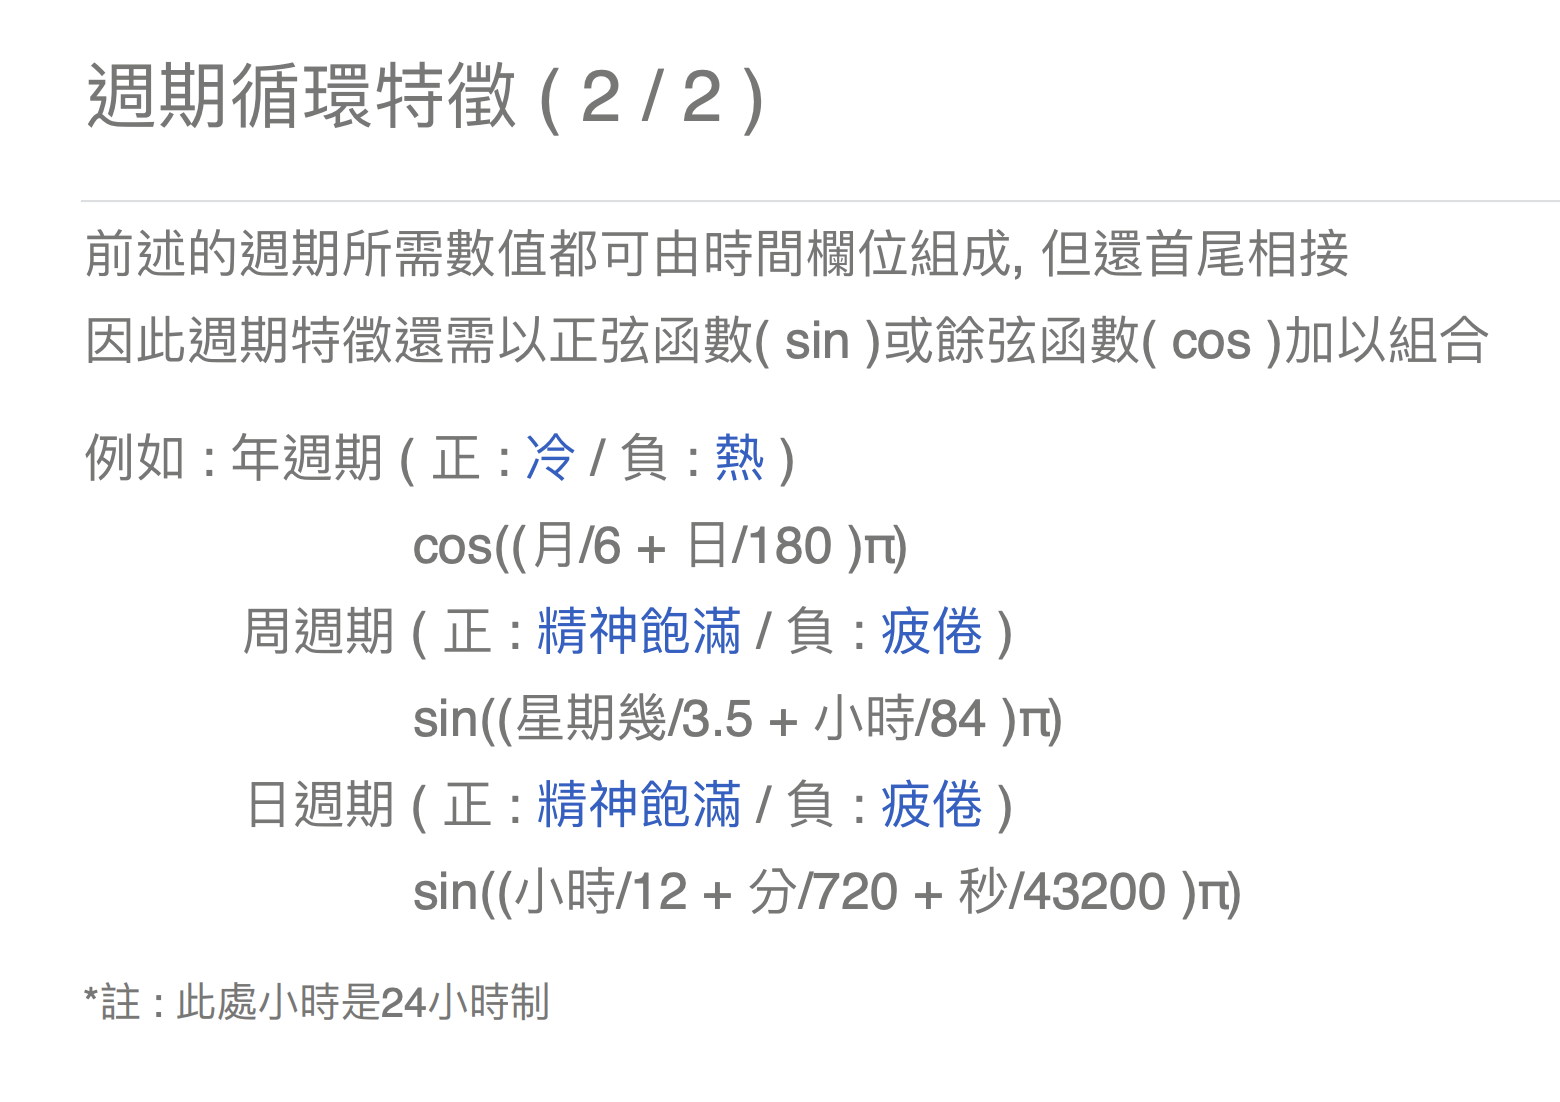

In [5]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
# 結果 : 預測力反而下降
df_temp = df.drop(['pickup_datetime'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.026412252675045565
Gradient Boosting Reg Score : 0.7078988429154286


## 範例 : 計程車費率預測
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

## [作業目標]

試著模仿範例寫法, 使用程車費率預測競賽練習時間欄位處理

## [作業重點]

新增星期幾(day of week)與第幾周(week of year)這兩項特徵, 觀察有什麼影響 (In[4], Out[4], In[5], Out[5])

新增加上年週期與周周期特徵 , 觀察有什麼影響 (In[8], Out[8], In[9], Out[9])

In [6]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

data_path = '/Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/data/Part02/'
df = pd.read_csv(data_path + 'taxi_data1.csv')

train_Y = df['fare_amount']
df = df.drop(['fare_amount'] , axis=1)
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-10-21 23:54:10 UTC,-73.990580,40.761071,-73.981128,40.758634,2
1,2015-02-03 10:42:03 UTC,-73.988403,40.723431,-73.989647,40.741695,1
2,2014-03-16 18:58:58 UTC,-74.015785,40.715110,-74.012029,40.707888,2
3,2009-06-13 16:10:54 UTC,-73.977322,40.787275,-73.958030,40.778838,3
4,2014-06-12 03:25:56 UTC,-73.989683,40.729717,-73.982490,40.761887,3


In [7]:
# 時間特徵分解方式:使用datetime
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S UTC'))
df['pickup_year'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%Y')).astype('int64')
df['pickup_month'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%m')).astype('int64')
df['pickup_day'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%d')).astype('int64')
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%H')).astype('int64')
df['pickup_minute'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%M')).astype('int64')
df['pickup_second'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%S')).astype('int64')
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56


In [8]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
scaler = MinMaxScaler()
train_X = scaler.fit_transform(df_temp)
Linear = LinearRegression()
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
GDBT = GradientBoostingRegressor()
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.026876871475633158
Gradient Boosting Reg Score : 0.7116043548868737


## 作業1

對照範例，試著加入星期幾 (day of week) 與第幾周 (week of year) 這兩項特徵，

看看結果會比原本只有時間特徵分解的結果更好或更差?

### http://strftime.org/

In [9]:
# 加入星期幾與第幾周兩個特徵
"""
Your Code Here
"""
# "%w" -- for day of week
df['day_of_week'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%w')).astype('int64')
# df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek

# "%U" -- for week of year
df['week_of_year'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%U')).astype('int64')
# df['pickup_week_of_year'] = df['pickup_datetime'].dt.weekofyear
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,day_of_week,week_of_year
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10,5,42
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3,2,5
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58,0,11
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54,6,23
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56,4,23


In [10]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.028722639911796022
Gradient Boosting Reg Score : 0.7102498882359491


In [11]:
# 加上"日週期"特徵 (參考講義"週期循環特徵")
import math
df['day_cycle'] = df['pickup_hour']/12 + df['pickup_minute']/720 + df['pickup_second']/43200
df['day_cycle'] = df['day_cycle'].map(lambda x:math.sin(x*math.pi))
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,day_of_week,week_of_year,day_cycle
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10,5,42,-0.025450
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3,2,5,0.333601
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58,0,11,-0.967083
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54,6,23,-0.888817
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56,4,23,0.782427


In [12]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.028234094061825355
Gradient Boosting Reg Score : 0.712476729282997


## 作業2

對照範例的日週期效果，試著參考投影片完成年週期與周週期的特徵 (也可以用你自己想到的方式)，

看看結果會比範例中的結果更好或更差?

In [13]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,day_of_week,week_of_year,day_cycle
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10,5,42,-0.025450
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3,2,5,0.333601
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58,0,11,-0.967083
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54,6,23,-0.888817
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56,4,23,0.782427


In [14]:
# 加上"年週期"與"周週期"特徵
"""
Your Code Here
年週期(正:冷/負:熱)
        cos((月/6 + 日/180)*pi)
周週期(正:精神飽滿/負:疲倦)
        sin((星期幾/3.5 + 小時/84)*pi
日週期(正:精神飽滿/負:疲倦)
        sin((小時/12 + 分/720 + 秒/43200)*pi)
"""
df['year_cycle'] = df['pickup_month']/6 + df['pickup_day']/180
df['year_cycle'] = df['year_cycle'].map(lambda x:math.cos(x*math.pi))

df['week_cycle'] = df['day_of_week']/3.5 + df['pickup_hour']/84
df['week_cycle'] = df['week_cycle'].map(lambda x:math.sin(x*math.pi))

df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,day_of_week,week_of_year,day_cycle,year_cycle,week_cycle
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10,5,42,-0.025450,0.777146,-0.804598
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3,2,5,0.333601,0.453990,0.826239
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58,0,11,-0.967083,-0.275637,0.623490
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54,6,23,-0.888817,-0.974370,-0.294755
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56,4,23,0.782427,-0.978148,-0.532032


In [15]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.02885870039520384
Gradient Boosting Reg Score : 0.7140513097453512


## 參考資料

## [PYTHON-基礎-時間日期處理小結](http://www.wklken.me/posts/2015/03/03/python-base-datetime.html)

這裡主要是摘錄一些 datetime 套件的時間欄位操作方式，使用這一個套件就能將各式時間格式轉成統一的時間物件，方便做轉換與特徵工程。

![img](https://lh3.googleusercontent.com/4ejfcM7uSnwPaBnVZ9K6uATUDRFtLuwIMBEIgycI0xeJdv9265VXFouRgFCDEf-u_H5vURlKP23t9DT6HSr--9qR4LItjuOi3wYj9RONFw4Y-ttC3GXiYewHK9IlKgSWjJKRJ92D9uk?t=1557393996830)

## [datetime — Basic date and time types](https://docs.python.org/3/library/datetime.html)

- python官方文件 

既然要使用 datetime 套件，詳細的內容當然要參考官方的文件囉。

除了各種細節的寫法，老師個人最常用到的還是 .strptime(將文字解析成時間物件) 以及 .strftime (轉出時間物件各欄位成文字)，以及右邊這張表(網頁最下方)，其中除了常見的年月日時分秒外，還有 %w(星期幾)，%U(第幾周) 這種方便的轉換函數呢!

![img](https://lh4.googleusercontent.com/JeDM0AEOOCQ9sQQZgnkegURVU2EJ6NnsdS4mnZXfUH8R5jecve75A3qNz27EfYv4h8Zx06Ij6ps6ybgcMjCXpfkonpl4tpiWdqWTfBz_6q3gqcpXmubd67kstElfElt96RLnjIvPNwA?t=1557394079396)